## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

## 💪 Competition challenge 1

In this first level, you’ll explore and summarise the dataset to understand its structure and key statistics. If you want to push yourself further, check out level two!
Create a report that answers the following:
- How many records are in the dataset, and what is the range of years covered?
- What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?
- How many full-time employees based in the US work 100% remotely?

## 💪 Competition challenge 2
In this second level, you’ll create visualisations to analyse the data and uncover trends. If you’re up for an even greater challenge, head to level three! Create a report that answers the following:

- Create a bar chart displaying the top 5 job titles with the highest average salary (in USD).
- Compare the average salaries for employees working remotely 100%, 50%, and 0%. What patterns or trends do you observe?
- Visualise the salary distribution (in USD) across company sizes (S, M, L). Which company size offers the highest average salary?

## 💪 Competition challenge 3

In this final level, you’ll develop predictive models and dive deeper into the dataset. If this feels overwhelming, consider completing the earlier levels first!
Create a report that answers the following:
- Analyse how factors such as country, experience level, and remote ratio impact salaries for Data Analysts, Data Scientists, and Machine Learning Engineers. In which conditions do professionals achieve the highest salaries?
- Develop a predictive model to estimate an employee’s salary (in USD) using experience level, company location, and remote ratio. Which features are the strongest predictors of salary?
- Expand your model by incorporating additional features, such as company size and employment type. Evaluate its performance, what improves, and what doesn’t? Finally, propose new features to make future salary predictions even more accurate future salary predictions even more accurate.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. Once the competition concludes, you'll have the opportunity to view and vote for the best submissions of others as the voting begins. The top 5 most upvoted entries will win. The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

Summarizing whats been observed:

### Null Values
There is no null in the whole dataset

### Duplicates 
The 52% of the records are duplicated. We consider them as datapoints corresponding to different employees and not errors.

| Column               | Description | Comments | Actions |
|----------------------|------------|----------|---------|
| **work_year**        | The year the salary was paid. | 2024 for the most part, fewer data points as we go back in time. First observations from 2020. | No action needed. |
| **experience_level** | Employee experience level:<br>**EN**: Entry-level / Junior<br>**MI**: Mid-level / Intermediate<br>**SE**: Senior / Expert<br>**EX**: Executive / Director | Highly imbalanced. | Convert to an ordered category. |
| **employment_type**  | Employment type:<br>**PT**: Part-time<br>**FT**: Full-time<br>**CT**: Contract<br>**FL**: Freelance | Highly imbalanced. | Convert to a category. |
| **job_title**        | The job title during the year. | Too many unique values (253). | Perform grouping. Convert to a category. Extract fields like manager, engineer, BI, ML, AI... |
| **salary**          | Gross salary paid (in local currency). | Useless due to different currencies. | Drop this column. |
| **salary_currency** | Salary currency (ISO 4217 code). | Highly imbalanced. | Convert to a category. |
| **salary_in_usd**   | Salary converted to USD using average yearly FX rate. | No outliers. All values seem legit. | No action needed. |
| **employee_residence** | Employee's primary country of residence (ISO 3166 code). | Highly imbalanced. | Convert to a category. |
| **remote_ratio**     | Percentage of remote work:<br>**0**: No remote work (<20%)<br>**50**: Hybrid (50%)<br>**100**: Fully remote (>80%) | 0 (no remote work) for the most part. Highly imbalanced. | Convert to a category. |
| **company_location** | Employer's main office location (ISO 3166 code). | Highly imbalanced. | Convert to a category. |
| **company_size**     | Company size:<br>**S**: Small (<50 employees)<br>**M**: Medium (50–250 employees)<br>**L**: Large (>250 employees) | Highly imbalanced. | Convert to an ordered category. |

In [151]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set_style("darkgrid")
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


In [153]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,57194.000000,57194,57194,57194,5.719400e+04,57194,57194.000000,57194,57194.000000,57194,57194
unique,NaN,4,4,253,NaN,25,NaN,91,NaN,82,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,33865,56975,9706,NaN,54467,NaN,51857,NaN,51909,55025
mean,2023.776305,NaN,NaN,NaN,1.641818e+05,NaN,159223.565829,NaN,22.211246,NaN,NaN
std,0.519883,NaN,NaN,NaN,2.060327e+05,NaN,72155.164297,NaN,41.424262,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2024.000000,NaN,NaN,NaN,1.094000e+05,NaN,109300.000000,NaN,0.000000,NaN,NaN
50%,2024.000000,NaN,NaN,NaN,1.495520e+05,NaN,149040.000000,NaN,0.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,2.000000e+05,NaN,200000.000000,NaN,0.000000,NaN,NaN


In [154]:
duplicates = df[df.duplicated(keep='first')]
print(f'There is a {round(100*len(duplicates)/len(df),2)}% of duplicated records based on all the columns')


There is a 52.25% of duplicated records based on all the columns


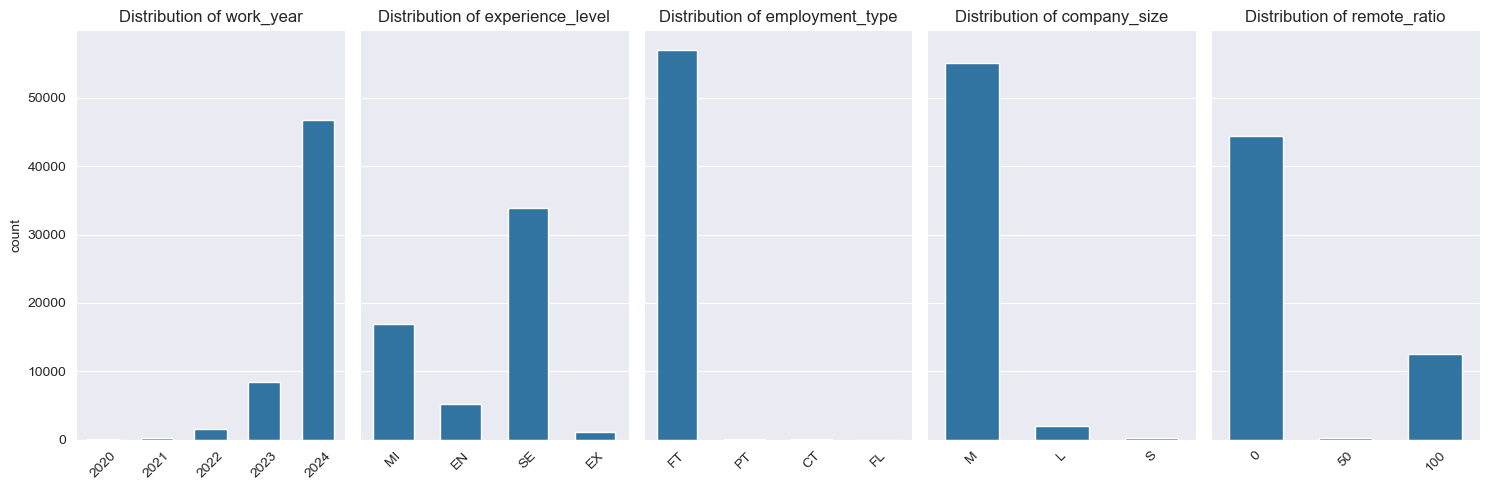

In [155]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

cols = ['work_year', 'experience_level', 'employment_type', 'company_size', 'remote_ratio']

for ax, col in zip(axes, cols):
    sns.countplot(x=col, data=df, ax=ax, width=0.6)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('') 
    ax.tick_params(axis='x', rotation=45)  # Rota etiquetas si son largas

plt.tight_layout()
plt.show()


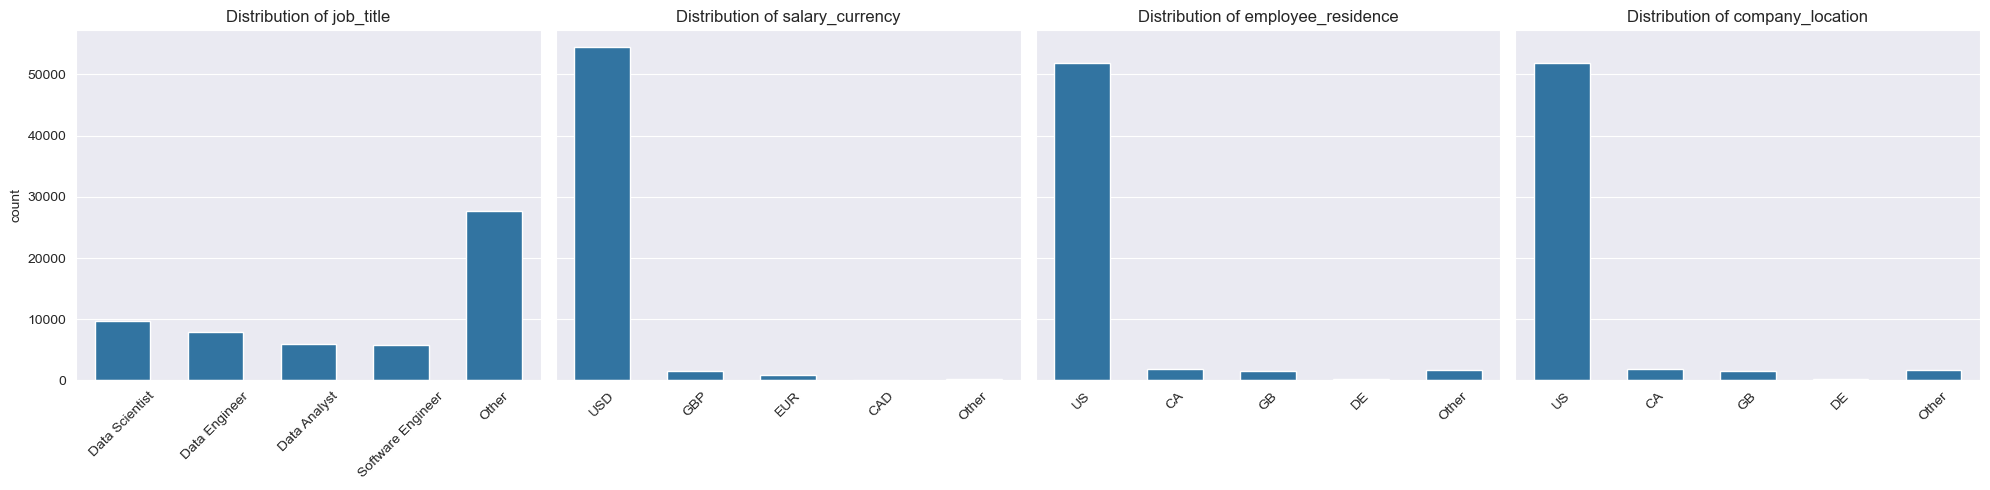

In [156]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)  # Compartir eje Y

cols = ['job_title', 'salary_currency', 'employee_residence', 'company_location']

for ax, col in zip(axes, cols):
    top_categories = df[col].value_counts().nlargest(4).index  # 4 más comunes
    data = df[col].apply(lambda x: x if x in top_categories else 'Other')  # Reemplaza el resto por "Other"
    
    sns.countplot(x=data, ax=ax, width=0.6, order=top_categories.tolist() + ['Other'])
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    del(data)
    
plt.tight_layout()
plt.show()

In [157]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [158]:
sorted_experience_level = ['EN', 'MI', 'SE', 'EX']
sorted_company_size = ['S', 'M', 'L']

df['experience_level'] = pd.Categorical(df['experience_level'], categories=sorted_experience_level, ordered=True)
df['company_size'] = pd.Categorical(df['company_size'], categories=sorted_company_size, ordered=True)


In [159]:
df['remote_ratio'] = np.where(df['remote_ratio']==0, 'presential', np.where(df['remote_ratio']==50, 'partial_remote','full_remote'))
df['remote_ratio'] = df['remote_ratio'].astype('category')

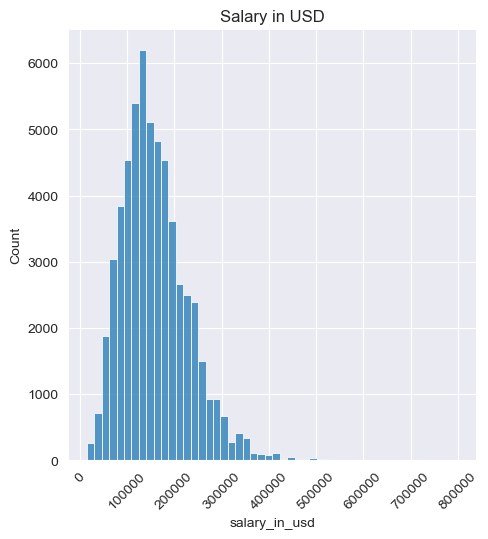

In [160]:
sns.displot(df.salary_in_usd, bins=50)
plt.title('Salary in USD')
plt.xticks(rotation=45)
plt.show()

In [161]:
df.salary_in_usd.quantile(0.99)

370000.0

In [162]:
(df.salary_in_usd<400000).mean()

0.9933734307794524

- How many records are in the dataset, and what is the range of years covered?

In [163]:
print(f'There are {len(df)} records in the dataset.')
print(f"The dataset contains observations from {df['work_year'].min()} to {df['work_year'].max()}")

There are 57194 records in the dataset.
The dataset contains observations from 2020 to 2024


- What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?

In [164]:
df[df['job_title'].isin(['Data Scientist', 'Data Engineer'])].groupby('job_title').agg({'salary_in_usd': 'mean'}).round(2)

,salary_in_usd
job_title,
Data Engineer,149315.00
Data Scientist,159397.07


The average salary for Data Scientists is higher.

- How many full-time employees based in the US work 100% remotely?

In [165]:
len(df[(df['remote_ratio']=='full_remote')&(df['employee_residence']=='US')])

11163

In [97]:
cat_cols = ['employment_type', 'salary_currency', 'employee_residence', 'company_location']
for col in cat_cols: 
    df[col] = df[col].astype('category')

SyntaxError: invalid syntax (2999303080.py, line 2)

In [93]:
df=df.drop('salary', axis=1)

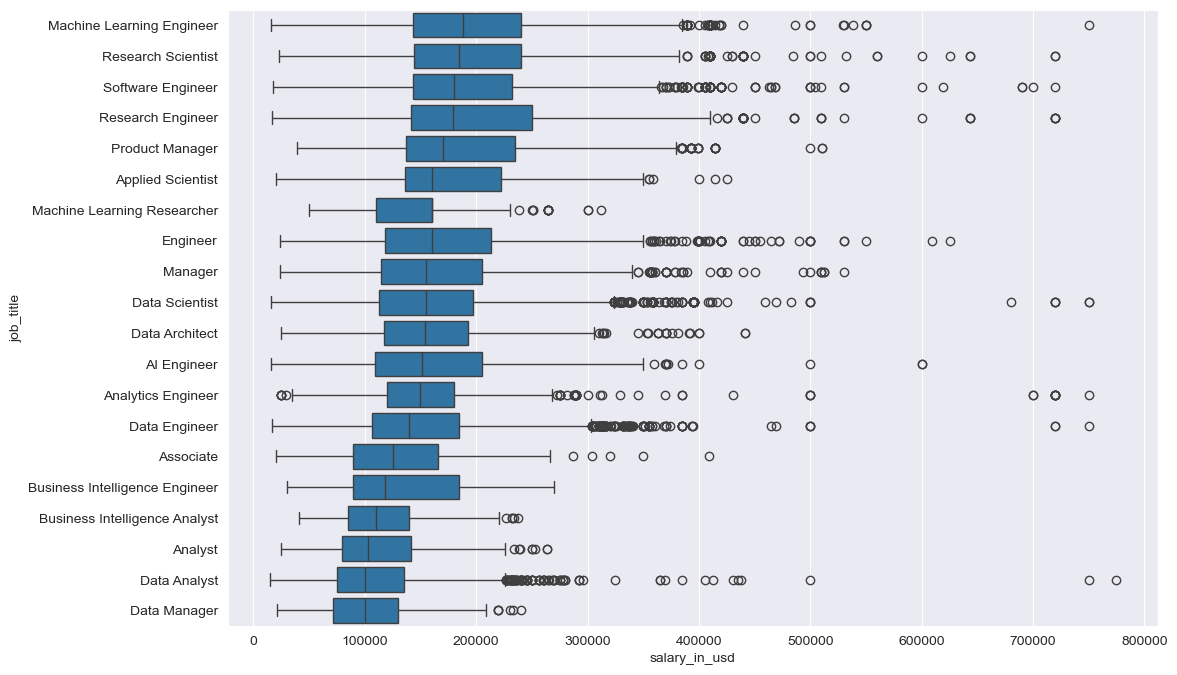

In [100]:
plt.figure(figsize=(12, 8))

top_20_titles = df['job_title'].value_counts().nlargest(20).index
df_top = df[df['job_title'].isin(top_20_titles)]
order = df_top.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).index

sns.boxplot(data=df_top, y='job_title', x='salary_in_usd', order=order)
plt.show()

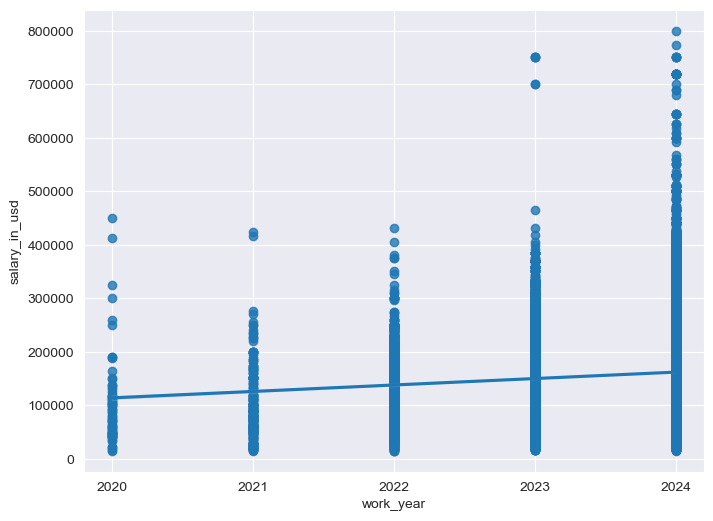

In [115]:
plt.figure(figsize=(8, 6))  

sns.regplot(data=df, x='work_year', y='salary_in_usd')
plt.xticks(sorted(df['work_year'].unique()))

plt.show()

<Figure size 1200x800 with 0 Axes>

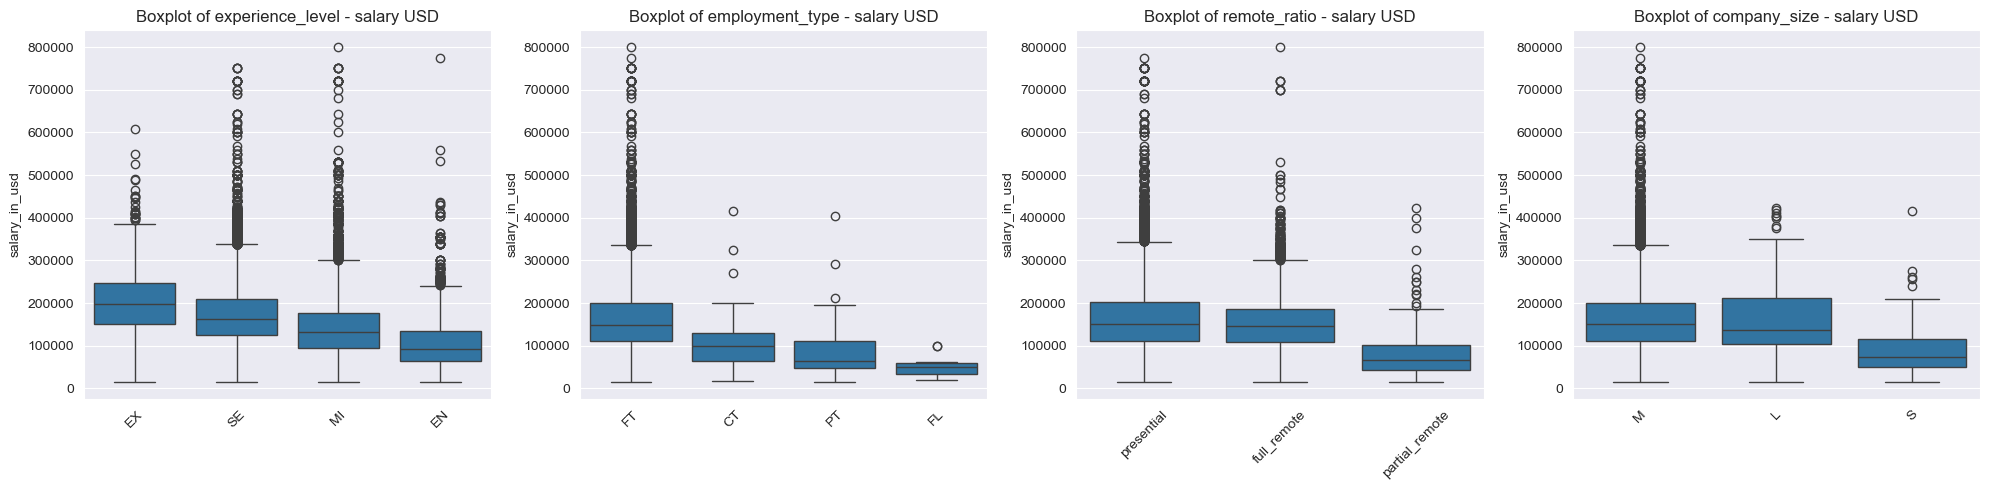

In [124]:
plt.figure(figsize=(12, 8))  

fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Compartir eje Y

cols = ['experience_level', 'employment_type', 'remote_ratio', 'company_size']

for ax, col in zip(axes, cols):
    order = df.groupby(col)['salary_in_usd'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=col, y='salary_in_usd', order=order, ax=ax)
    
    ax.set_title(f'Boxplot of {col} - salary USD')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()


/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_70724/2448058033.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order = df_top.groupby('employee_residence')['salary_in_usd'].median().dropna().sort_values(ascending=False).index


<Axes: xlabel='salary_in_usd', ylabel='employee_residence'>

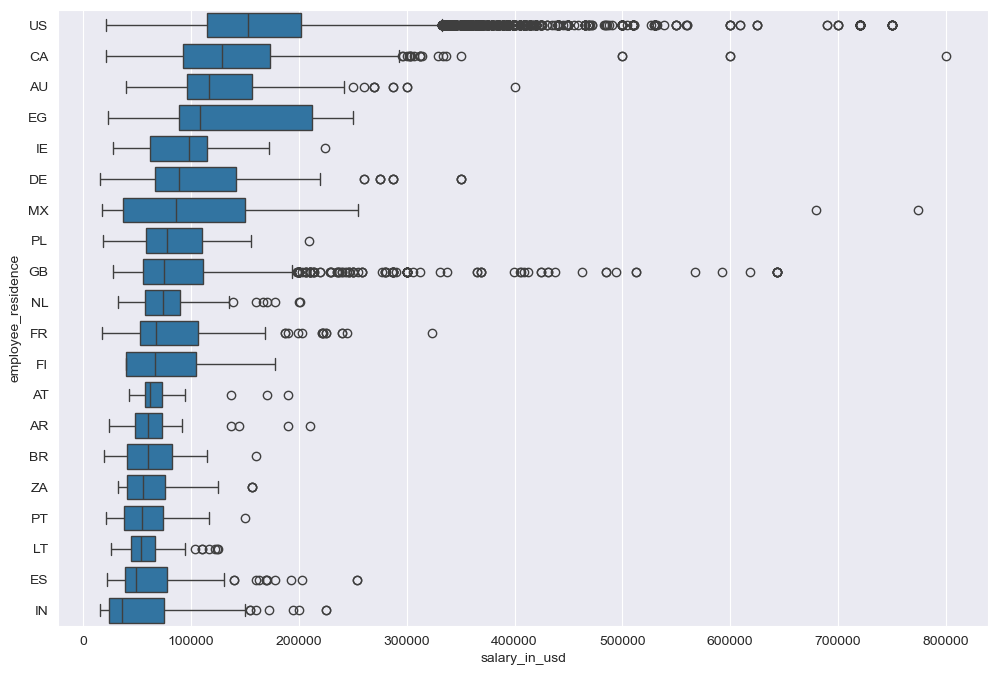

In [111]:
plt.figure(figsize=(12, 8))

top_20_res = df['employee_residence'].value_counts().nlargest(20).index
df_top = df[df['employee_residence'].isin(top_20_res)]
order = df_top.groupby('employee_residence')['salary_in_usd'].median().dropna().sort_values(ascending=False).index

sns.boxplot(data=df_top, y='employee_residence', x='salary_in_usd', order=order)

/var/folders/tx/44c409ls4bvf__rjhb2qjmf40000gn/T/ipykernel_70724/686875066.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order = df_top.groupby('company_location')['salary_in_usd'].median().dropna().sort_values(ascending=False).index


<Axes: xlabel='salary_in_usd', ylabel='company_location'>

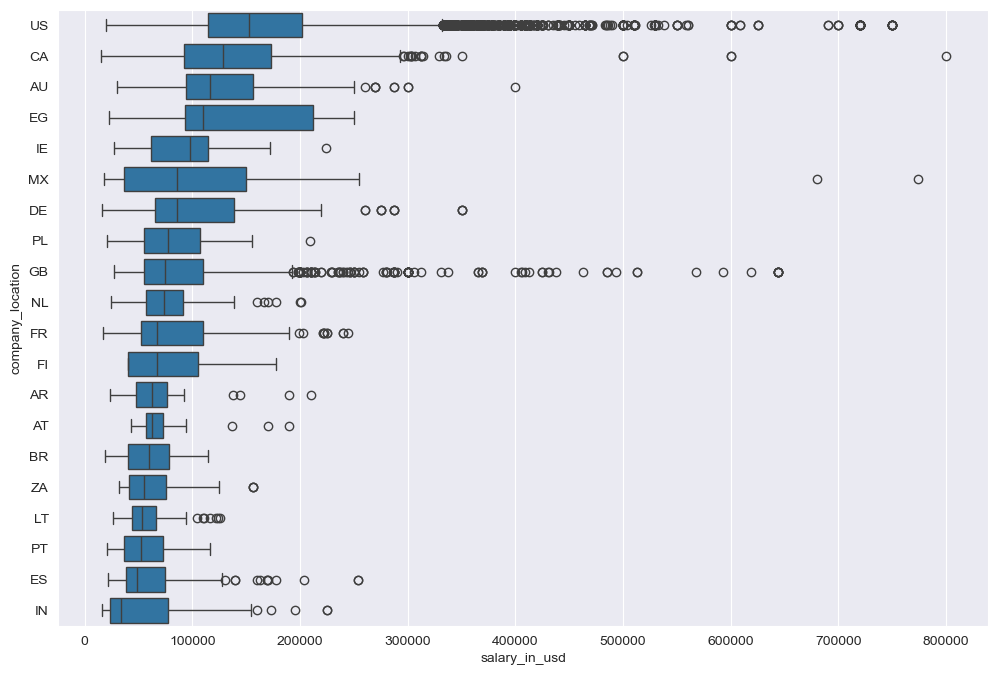

In [112]:
plt.figure(figsize=(12, 8))

top_20_res = df['company_location'].value_counts().nlargest(20).index
df_top = df[df['company_location'].isin(top_20_res)]
order = df_top.groupby('company_location')['salary_in_usd'].median().dropna().sort_values(ascending=False).index

sns.boxplot(data=df_top, y='company_location', x='salary_in_usd', order=order)

## Bivariate Analysis

- Create a bar chart displaying the top 5 job titles with the highest average salary (in USD).

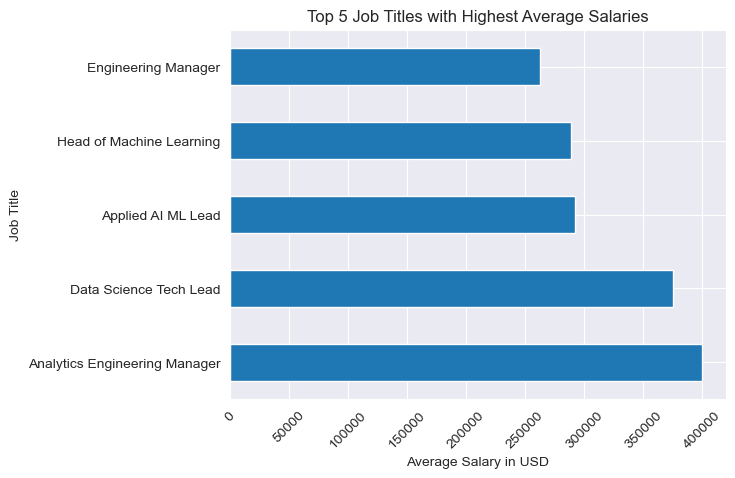

In [177]:
biggest_salaries = df.groupby('job_title')['salary_in_usd'].mean().nlargest(5).round()
biggest_salaries.plot(kind='barh')
plt.xlabel("Average Salary in USD")
plt.ylabel("Job Title")
plt.title("Top 5 Job Titles with Highest Average Salaries")
plt.xticks(rotation=45)
plt.show()

- Compare the average salaries for employees working remotely 100%, 50%, and 0%. What patterns or trends do you observe?

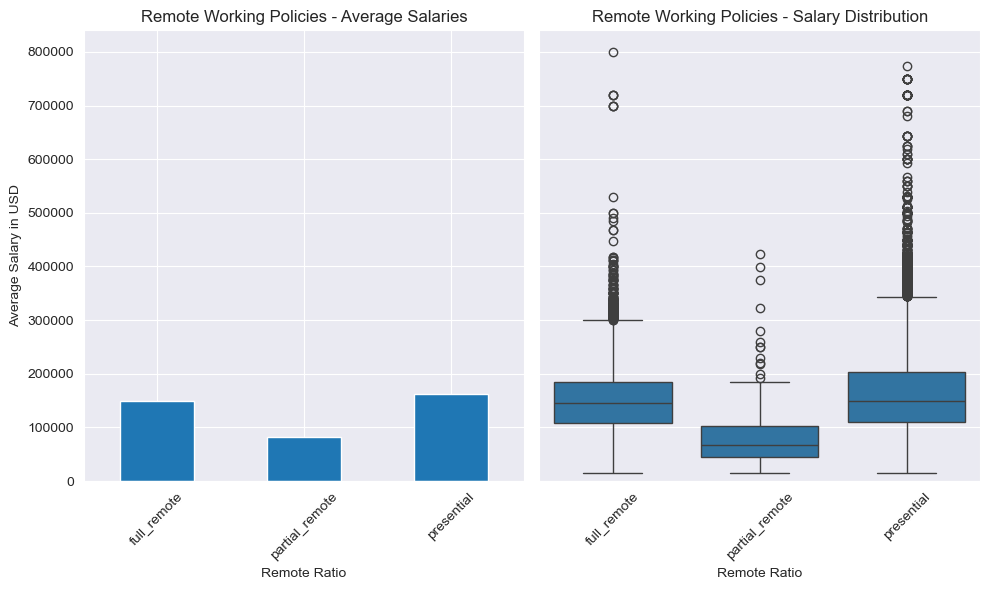

In [184]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Bar plot
remote_salaries = df.groupby('remote_ratio')['salary_in_usd'].mean().round()
remote_salaries.plot(kind='bar', ax=axes[0])
axes[0].set_ylabel("Average Salary in USD")
axes[0].set_xlabel("Remote Ratio")
axes[0].set_title("Remote Working Policies - Average Salaries")
axes[0].tick_params(axis='x', rotation=45)

# Box plot
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', ax=axes[1])
axes[1].set_xlabel("Remote Ratio")
axes[1].set_ylabel("Salary in USD")
axes[1].set_title("Remote Working Policies - Salary Distribution")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [186]:
df['remote_ratio'].unique()

['presential', 'full_remote', 'partial_remote']
Categories (3, object): ['full_remote', 'partial_remote', 'presential']

In [188]:
for ratio in df['remote_ratio'].unique():
    print(f"Remote Ratio {ratio}: {stats.shapiro(df[df['remote_ratio'] == ratio]['salary_in_usd'])}")



Remote Ratio presential: ShapiroResult(statistic=0.9378743572713967, pvalue=7.308651803049217e-83)
Remote Ratio full_remote: ShapiroResult(statistic=0.9552692281709003, pvalue=9.912880933344169e-52)
Remote Ratio partial_remote: ShapiroResult(statistic=0.7905524712510863, pvalue=2.319510472191095e-18)


Since the salary distributions are not normal (p too small, not supporting null hypothesis of normality), we cannot use ANOVA. Lets use kruskal-Wallis instead. Since the distribution of the partial_remote category is clearly different, we dont include it in the test.

In [190]:
kruskal_result = stats.kruskal(df[df['remote_ratio'] == 'presential']['salary_in_usd'], 
                         df[df['remote_ratio'] == 'full_remote']['salary_in_usd'])

print("Kruskal-Wallis result:", kruskal_result)

Kruskal-Wallis result: KruskalResult(statistic=202.10202389278268, pvalue=7.263315656550363e-46)


In [ ]:
The p-lau

The partial_remote policy is less paid that the other two policies. Presencial is the best payed of all three.

- Visualise the salary distribution (in USD) across company sizes (S, M, L). Which company size offers the highest average salary?

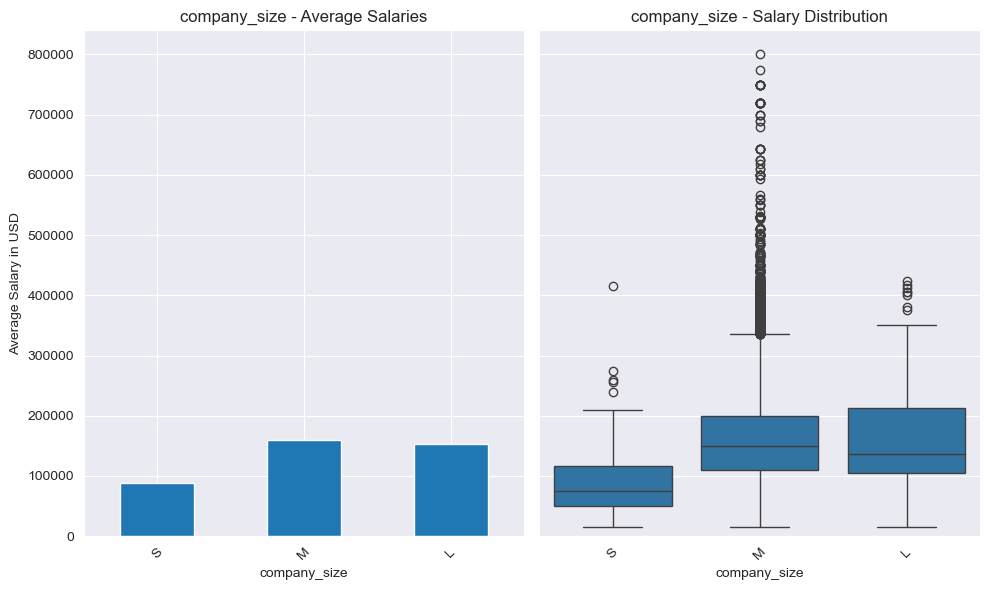

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

# Bar plot
remote_salaries = df.groupby('company_size')['salary_in_usd'].mean().round()
remote_salaries.plot(kind='bar', ax=axes[0])
axes[0].set_ylabel("Average Salary in USD")
axes[0].set_xlabel("company_size")
axes[0].set_title("company_size - Average Salaries")
axes[0].tick_params(axis='x', rotation=45)

# Box plot
sns.boxplot(data=df, x='company_size', y='salary_in_usd', ax=axes[1])
axes[1].set_xlabel("company_size")
axes[1].set_ylabel("Salary in USD")
axes[1].set_title("company_size - Salary Distribution")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

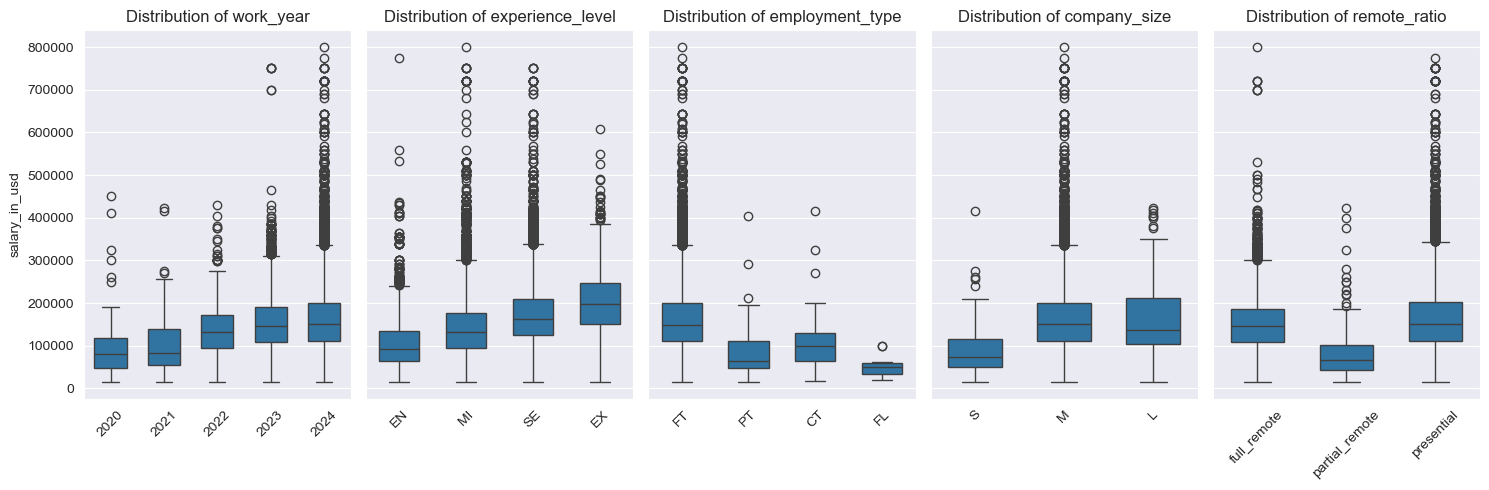

In [166]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

cols = ['work_year', 'experience_level', 'employment_type', 'company_size', 'remote_ratio']

for ax, col in zip(axes, cols):
    sns.boxplot(data=df, x=col, y='salary_in_usd', ax=ax, width=0.6)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel('') 
    ax.tick_params(axis='x', rotation=45)  # Rota etiquetas si son largas

plt.tight_layout()
plt.show()
